In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from IPython.display import Image
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
from folium import plugins
from datetime import datetime
import datetime as dt
import json
from scipy import stats

import os

In [5]:
path="/content/drive/MyDrive/smart_parking/data/"

In [6]:
NYC_PM = pd.read_csv(path + "NYC_PM.csv")
NYC_PM.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


In [7]:
NYC_PM.shape

(169999, 31)

In [8]:
NYC_PM.dtypes

SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin2             int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
bin10            int64
bin11            int64
bin12            int64
bin13            int64
bin14            int64
bin15            int64
bin16            int64
bin17            int64
bin18            int64
bin19            int64
bin20            int64
bin21            int64
bin22            int64
bin23            int64
temperature    float64
humidity       float64
pm25           float64
dtype: object

In [9]:
NYC_PM.describe()

,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
count,1.699990e+05,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,...,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000,169999.000000
mean,1.634506e+09,40.826202,-73.892555,78.485926,8.056747,1.885382,0.551209,0.806628,0.578003,0.367173,...,0.000247,0.000159,0.000118,0.000059,0.000065,0.000047,0.000141,17.432182,56.241018,4.310939
std,2.197971e+06,0.017215,0.019362,148.612154,22.639578,4.616222,1.461197,1.969984,1.535912,1.020670,...,0.016086,0.012602,0.010846,0.007669,0.008044,0.006860,0.012366,6.659859,16.583384,1.794719
min,1.631277e+09,40.711689,-73.934052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,0.000000,1.568473
25%,1.632808e+09,40.813564,-73.911232,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.400000,42.200000,3.162405
50%,1.633554e+09,40.818981,-73.892303,39.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,55.300000,4.251249
75%,1.636266e+09,40.845383,-73.870804,92.000000,9.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.600000,69.000000,4.786389
max,1.639579e+09,40.904430,-73.820808,6233.000000,2493.000000,305.000000,106.000000,101.000000,92.000000,59.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,32.400000,100.000000,12.744419


In [10]:
NYC_PM.isnull().sum()

SensorID       0
time           0
latitude       0
longitude      0
bin0           0
bin1           0
bin2           0
bin3           0
bin4           0
bin5           0
bin6           0
bin7           0
bin8           0
bin9           0
bin10          0
bin11          0
bin12          0
bin13          0
bin14          0
bin15          0
bin16          0
bin17          0
bin18          0
bin19          0
bin20          0
bin21          0
bin22          0
bin23          0
temperature    0
humidity       0
pm25           0
dtype: int64

In [11]:
import pandas as pd
from pandas import read_csv
from datetime import datetime

NYC_PM['time'] = pd.to_datetime(NYC_PM['time'], unit='s')
#NYC_PM.drop("SensorID",axis=1,inplace=True)


# the first 5 rows
print(NYC_PM .head())

      SensorID                time   latitude  longitude  bin0  bin1  bin2  \
0  NYCP2_CS01A 2021-09-10 12:35:04  40.847672 -73.869316    11     1     1   
1  NYCP2_CS01A 2021-09-10 12:35:08  40.847668 -73.869316    22     4     1   
2  NYCP2_CS01A 2021-09-10 12:35:13  40.847649 -73.869362    40     1     1   
3  NYCP2_CS01A 2021-09-10 12:35:18  40.847649 -73.869362    26     1     0   
4  NYCP2_CS01A 2021-09-10 12:35:23  40.847649 -73.869362    44     4     0   

   bin3  bin4  bin5  ...  bin17  bin18  bin19  bin20  bin21  bin22  bin23  \
0     0     0     0  ...      0      0      0      0      0      0      0   
1     0     0     2  ...      0      0      0      0      0      0      0   
2     0     0     1  ...      0      0      0      0      0      0      0   
3     0     0     0  ...      0      0      0      0      0      0      0   
4     1     0     0  ...      0      0      0      0      0      0      0   

   temperature  humidity      pm25  
0         23.7      57.3  4.508

In [12]:
print(NYC_PM.columns)

Index(['SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2',
       'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10',
       'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18',
       'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity',
       'pm25'],
      dtype='object')


In [13]:
NYC_PM=NYC_PM.drop(columns=['SensorID', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18', 'bin19', 'bin20', 'bin21', 'bin22', 'bin23'])

# manually specify column names
NYC_PM.columns = ['time', 'latitude', 'longitude', 'temperature', 'humidity', 'pollution']
NYC_PM.set_index('time', inplace=True)
NYC_PM.index.name = 'date'

print(NYC_PM .head())
# save to file
NYC_PM.to_csv('NYC_PM_edited.csv')

                      latitude  longitude  temperature  humidity  pollution
date                                                                       
2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813
2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420
2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881
2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813
2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503


In [1]:
!pip install geohash2

  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15544 sha256=e2fed5ed70d09ff2e416d6398ce2dbcf2ffced4afdfdbe0319c0c7b7716bee09
  Stored in directory: /root/.cache/pip/wheels/c0/21/8d/fe65503f4f439aef35193e5ec10a14adc945e20ff87eb35895
Successfully built geohash2


In [14]:
import pandas as pd
import numpy as np
import geohash2
from geohash2 import encode

# We want to gain the geohash of the latitude and longitude columns:
def calculate_geohash(row):
    return encode(row['latitude'], row['longitude'], precision=12)
#Adding a geohash column to the table
NYC_PM['geohash'] = NYC_PM.apply(calculate_geohash, axis=1)
print(NYC_PM.head())

#gropuing the data by geohash
grouped_data = NYC_PM.groupby('geohash')

                      latitude  longitude  temperature  humidity  pollution  \
date                                                                          
2021-09-10 12:35:04  40.847672 -73.869316         23.7      57.3   4.508813   
2021-09-10 12:35:08  40.847668 -73.869316         23.7      57.8   5.462420   
2021-09-10 12:35:13  40.847649 -73.869362         23.7      57.8   5.154881   
2021-09-10 12:35:18  40.847649 -73.869362         23.6      57.6   4.508813   
2021-09-10 12:35:23  40.847649 -73.869362         23.6      57.5   5.539503   

                          geohash  
date                               
2021-09-10 12:35:04  dr72rh44bjvy  
2021-09-10 12:35:08  dr72rh44bjjy  
2021-09-10 12:35:13  dr72rh1fz1em  
2021-09-10 12:35:18  dr72rh1fz1em  
2021-09-10 12:35:23  dr72rh1fz1em  


In [15]:
grouped_data.head(20)

,latitude,longitude,temperature,humidity,pollution,geohash
date,,,,,,
2021-09-10 12:35:04,40.847672,-73.869316,23.7,57.3,4.508813,dr72rh44bjvy
2021-09-10 12:35:08,40.847668,-73.869316,23.7,57.8,5.462420,dr72rh44bjjy
2021-09-10 12:35:13,40.847649,-73.869362,23.7,57.8,5.154881,dr72rh1fz1em
2021-09-10 12:35:18,40.847649,-73.869362,23.6,57.6,4.508813,dr72rh1fz1em
2021-09-10 12:35:23,40.847649,-73.869362,23.6,57.5,5.539503,dr72rh1fz1em
...,...,...,...,...,...,...
2021-09-12 14:31:49,40.823353,-73.890488,24.6,54.8,5.460360,dr72nxdt6bdf
2021-09-12 14:31:54,40.823349,-73.890480,24.6,54.8,5.298209,dr72nxdt5pbd
2021-09-12 14:31:59,40.823349,-73.890480,24.6,54.8,6.470661,dr72nxdt5pbd


In [16]:
import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
nyc_map = gpd.read_file(path + "nyc_polygon.geojson")

In [30]:
from shapely.geometry import Point

#Perform spatial join of NYC Pollution data with NYC Geometry data
NYC_PM['geometry'] = NYC_PM.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
pollution_geo = gpd.GeoDataFrame(NYC_PM, geometry='geometry')

merged_data = gpd.sjoin(nyc_map, pollution_geo, how='right', op='contains')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-30-09adf53c597f>:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data = gpd.sjoin(nyc_map, pollution_geo, how='right', op='contains')


In [31]:
merged_data = merged_data.drop('index_left', axis=1)

In [32]:
merged_data.head()

,neighborhood,boroughCode,borough,@id,latitude,longitude,temperature,humidity,pollution,geohash,geometry
date,,,,,,,,,,,
2021-09-10 12:35:04,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847672,-73.869316,23.7,57.3,4.508813,dr72rh44bjvy,POINT (-73.86932 40.84767)
2021-09-10 12:35:08,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847668,-73.869316,23.7,57.8,5.462420,dr72rh44bjjy,POINT (-73.86932 40.84767)
2021-09-10 12:35:13,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847649,-73.869362,23.7,57.8,5.154881,dr72rh1fz1em,POINT (-73.86936 40.84765)
2021-09-10 12:35:18,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847649,-73.869362,23.6,57.6,4.508813,dr72rh1fz1em,POINT (-73.86936 40.84765)
2021-09-10 12:35:23,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborho...,40.847649,-73.869362,23.6,57.5,5.539503,dr72rh1fz1em,POINT (-73.86936 40.84765)


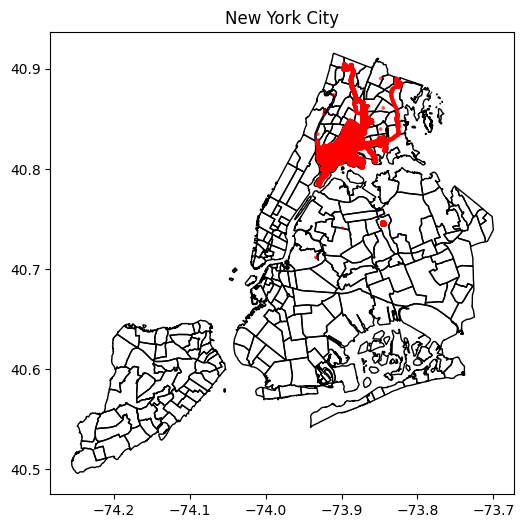

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = nyc_map.plot(ax=ax, facecolor="none", edgecolor="black")
ax.scatter(merged_data['longitude'], merged_data['latitude'], s=merged_data['pollution'], color='red', alpha=0.5)

ax.set_title("New York City")
plt.show()

In [ ]:
print("Areas containing pollution")
print("Latitude range = [" + str(min(NYC_PM['latitude'])) + " -- "  + str(max(NYC_PM['latitude'])) + "]")
print("Longitude range = [" + str(min(NYC_PM['longitude'])) + " -- "  + str(max(NYC_PM['longitude'])) + "]")

In [ ]:
#Average areas with pollution
print("Average pollution areas:")
print(sum(NYC_PM['latitude'])/ len(NYC_PM))
print(sum(NYC_PM['longitude'])/ len(NYC_PM))

In [ ]:
areas = merged_data['borough'].unique()

In [ ]:
#Stratified sampling
groups = []
for area in areas:
  groups.append(merged_data[merged_data['borough'] == area])